# Telco customer churn

## Step to follow





## 1. Importing libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.pipeline import Pipeline

## 2. Reading the Data

In [2]:
#Reading the data from train.csv
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [5]:
# check the shape of the data
df.shape

(7043, 21)

In [6]:
# know what columns are there
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# TotalCharges column contain numeric but showing dtype as object
# Need toconvert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## 3. Exploratory Data Analysis

### 3.1 Handling with null values

In [9]:
# Checking percentage of null values
(df.isnull().sum()/len(df)*100)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [10]:
# droping the null values in it
df.dropna(inplace=True,axis=0)

### 3.2 Handling with outliers

In [11]:
# check outliers in the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


<Axes: xlabel='TotalCharges'>

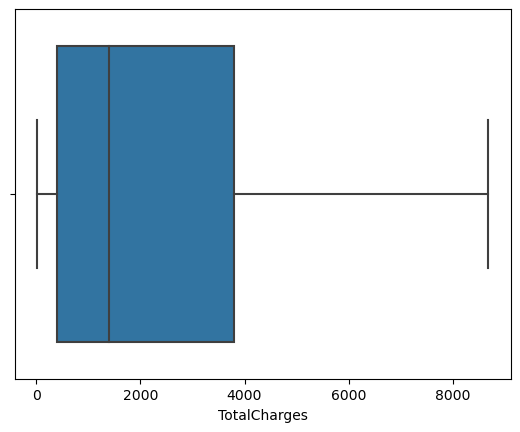

In [12]:
# this boxplot also shows if there is outlier of in the column TotalCharge
sns.boxplot(x=df['TotalCharges'])

### The above graph shows there is no outlier in this column

<Axes: xlabel='tenure'>

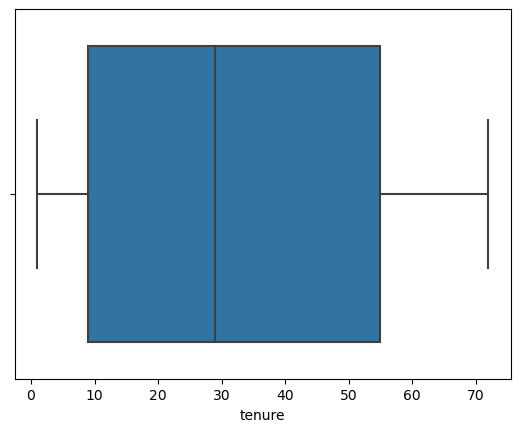

In [13]:
# this boxplot also shows if there is outlier of in the column tenure
sns.boxplot(x=df['tenure'])

### The above graph shows there is no outlier in this column

<Axes: xlabel='MonthlyCharges'>

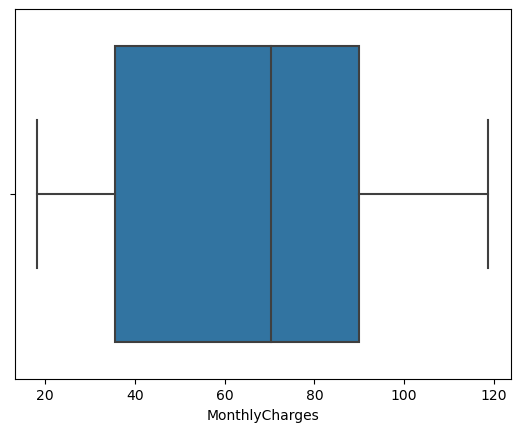

In [14]:
# this boxplot also shows if there is outlier of in the column tenure
sns.boxplot(x=df['MonthlyCharges'])

### 3.3 Visualization

### Need to check the corrilation in the data 

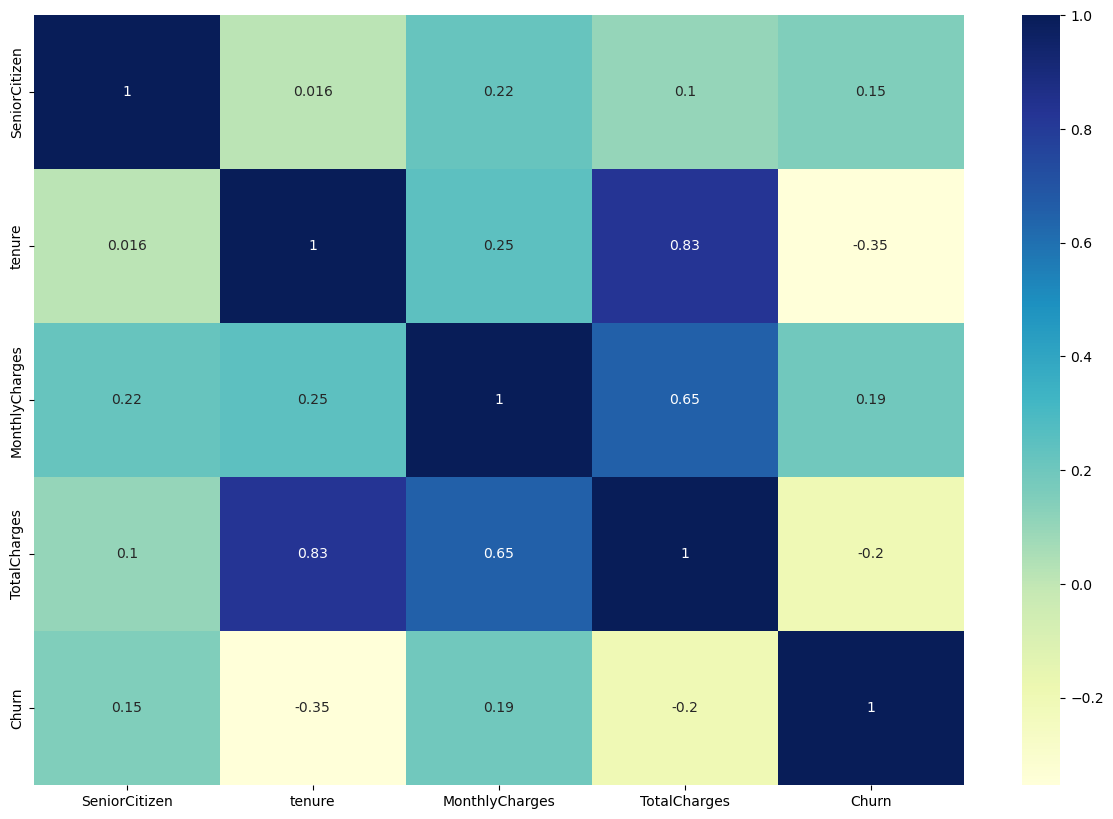

In [15]:
# Let's check the correlation
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### total charges has 83% correlation with tenure so we need to remove any one

In [16]:
# Removing Totalcharge
df = df.drop('TotalCharges',axis=1)

### Check weather the data is balanced are not

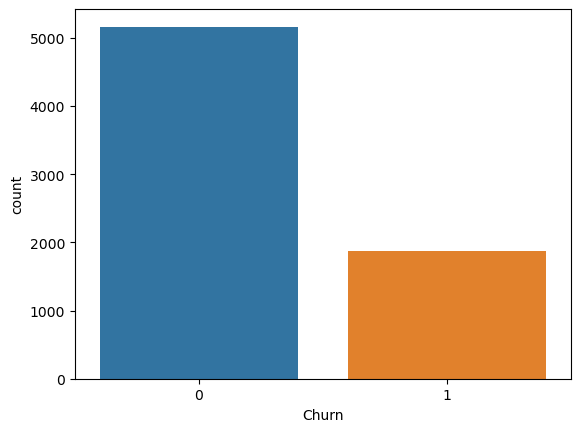

In [17]:
# count plot on single categorical variable
sns.countplot(x ='Churn', data = df)
 
# Show the plot
plt.show()

### The above countplot shows that the churn is imbalanced

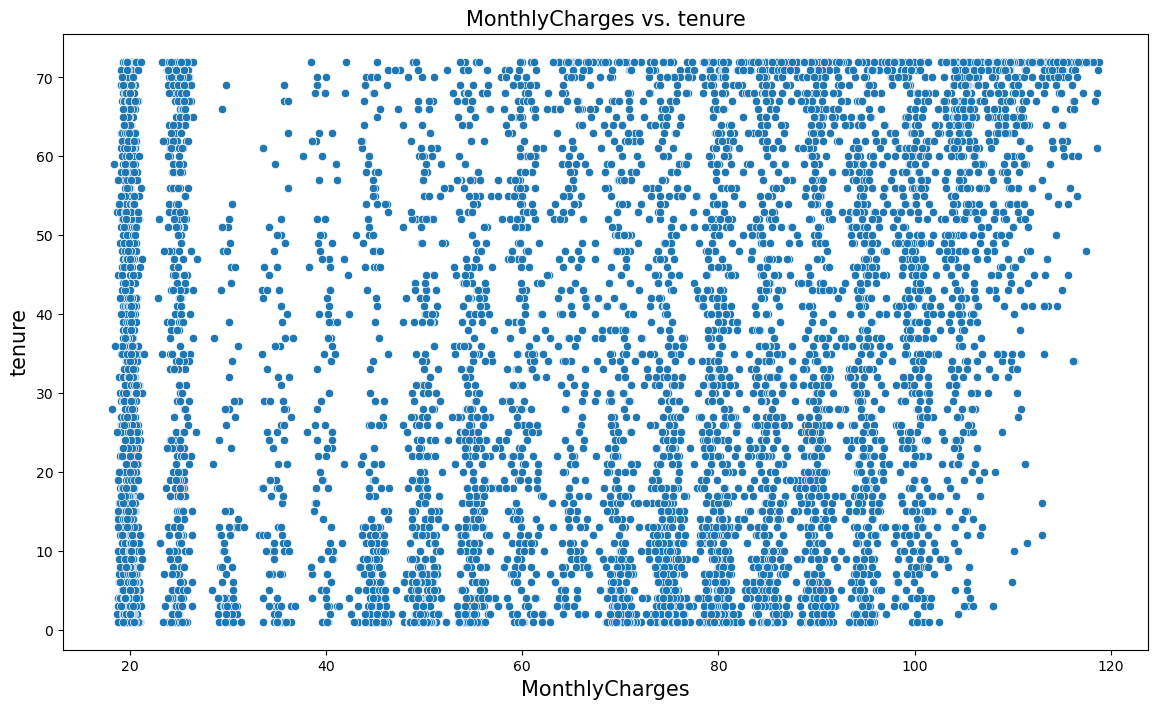

In [18]:
# plotting the scatter plot
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x="MonthlyCharges", y="tenure", ax = ax)
plt.title("MonthlyCharges vs. tenure", size=15)
plt.xlabel("MonthlyCharges", size=15)
plt.ylabel(("tenure"), size=15)
plt.show()

### As MonthlyCharge increases tenure increases

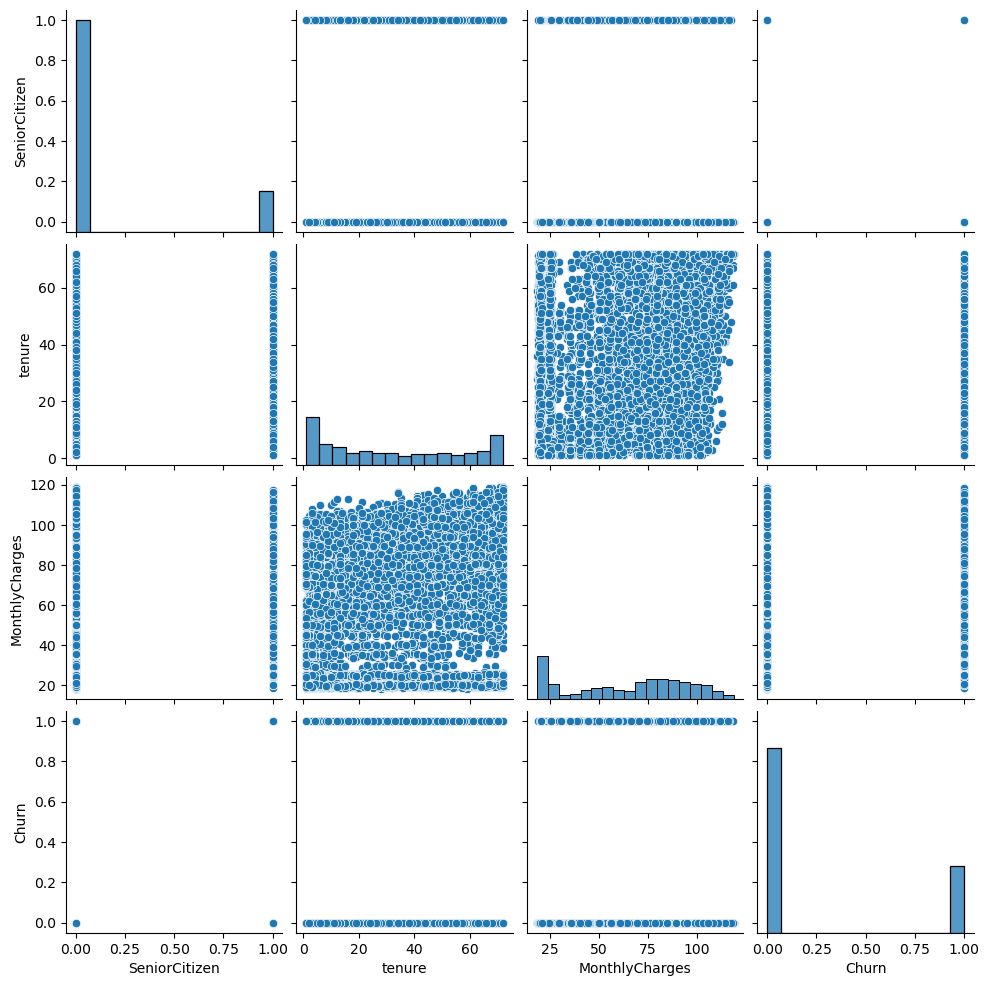

In [19]:
sns.pairplot(df)

## Above pairplot shows the distribution of each column

## 4. Feature Engineering

In [20]:
# droping the customerid since it is no use
df = df.drop('customerID',axis=1)

In [21]:
# store df into df1
df1 = df

### Export cleaned data 

In [22]:
# to converting df into csv and storing in it
df1.to_csv("data.csv",index=False)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


### Convert categorical variables into numerical

In [23]:
# use label encoding to convert it
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [24]:
# storing categorical data into df_cat
df_cat = df.select_dtypes("object")

In [25]:
# convert categorical columns and store it in df
for i in df_cat:
    df[i]=oe.fit_transform(df[[i]])

In [26]:
# Ensure requred columns are there
df.shape

(7032, 19)

In [27]:
# Know all the columns
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,1


### Feature Selection

In [28]:
# adding dependent feature to y and independent feature to X
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Split the data into 70% training and 30% testing

In [29]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# see x_train
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
3946,0.0,0,0.0,0.0,9,0.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,58.50
3394,1.0,0,0.0,0.0,26,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,61.55
1635,0.0,0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,69.95
4088,1.0,0,0.0,0.0,7,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,73.60
1886,1.0,0,1.0,1.0,67,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,60.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,0,0.0,0.0,3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.40
5199,0.0,0,0.0,0.0,51,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,111.50
5235,1.0,0,0.0,0.0,9,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,81.15
5399,0.0,0,0.0,0.0,50,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,19.75


In [31]:
# see y_train
y_train

3946    1
3394    0
1635    0
4088    1
1886    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 4922, dtype: int64

In [32]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
# execute the scaling part
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

### Store that scaled part into pickle by dumping

In [34]:
import pickle
scale = open('scaler.pkl','wb')
pickle.dump(scaler, scale)

# Logestic Regression

In [35]:
# Define the model as lr
lr = LogisticRegression()

In [36]:
# model fiiting and predicting
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [37]:
# check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.53%


In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))  

[[1386  163]
 [ 269  292]]


In [39]:
# classification report
class_re=classification_report(y_test,y_pred)
print("classification_report\n\n")
print(class_re)

classification_report


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Accuracy, f1_score, precision and recall 

In [40]:
# test train accuracy
tr = model_lr.score(X_train, y_train)*100
ts = model_lr.score(X_test, y_test)*100
print('training_accuracy',round(tr,2))
print('testing_accuracy',round(ts,2))

training_accuracy 80.33
testing_accuracy 79.53


### LogisticRegression giving the best Accuracy

### No overfitting

# Random Forest

In [41]:
# calling random forest classification
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.34%


In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction_test))  

[[1421  128]
 [ 308  253]]


In [43]:
# report
class_re_rf=classification_report(y_test,prediction_test)
print("classification_report_RandomForest\n\n")
print(class_re_rf)


classification_report_RandomForest


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



# SVM

In [44]:
# model calling
from sklearn.svm import SVC
model = SVC()
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.53%


In [45]:
# Create the Confusion matrix
print(confusion_matrix(y_test,preds))  

[[1377  172]
 [ 260  301]]


In [46]:
# report
class_re_svc=classification_report(y_test,preds)
print("classification_report_SVC\n\n")
print(class_re_svc)


classification_report_SVC


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



# ADA Boost

In [47]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
ada_preds = model.predict(X_test)
accuracy = accuracy_score(y_test, ada_preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.76%


In [48]:
# Create the Confusion matrix
print(confusion_matrix(y_test,ada_preds))  

[[1369  180]
 [ 247  314]]


In [49]:
# report
class_re_ada=classification_report(y_test,ada_preds)
print("classification_report_ADA_Boost\n\n")
print(class_re_ada)


classification_report_ADA_Boost


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



# Xg boost

In [50]:
# xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
XG_preds = model.predict(X_test)
accuracy = accuracy_score(y_test, XG_preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.20%


In [51]:
# Create the Confusion matrix
print(confusion_matrix(y_test,XG_preds))  

[[1347  202]
 [ 279  282]]


In [52]:
# report
class_re_ada=classification_report(y_test,XG_preds)
print("classification_report_ADA_Boost\n\n")
print(class_re_ada)


classification_report_ADA_Boost


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.58      0.50      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



# Evaluating

In [53]:
# read new data
new_df = pd.read_csv('test.csv')

In [54]:
# check new data
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [55]:
# same number of columns 
new_df.shape

(20, 19)

In [56]:
# new data has no null values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [57]:
# columns of new data are matching exactly with X_train
new_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [58]:
# drop the TotalCharge
new_df = new_df.drop('TotalCharges', axis=1)

# Test model on new data

In [59]:
# covert categorical data to numerical
new_df_cat = new_df.select_dtypes("object")

In [60]:
for i in new_df_cat:
    new_df[i]=oe.fit_transform(new_df[[i]])

In [61]:
# dump the best model into pickle
import pickle
pickle.dump(model_lr, open('model.pkl', 'wb'))

In [62]:
# load that model back
pred_model = pickle.load(open('model.pkl','rb'))

In [63]:
# data is numerical
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1.0,0,0.0,0.0,25,1.0,0.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,0.0,1.0,2.0,106.00
1,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,30.00
2,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85
3,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85
4,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85


In [64]:
## Scale the new data
new_df = scaler.transform(new_df)
## Prediction on new data
new_pred = pred_model.predict(new_df)

In [65]:
# view new pred
new_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [66]:
# dump the scaling part to pickle
ordinal = open('oridinal_encoder.pkl','wb')
pickle.dump(oe, ordinal)

# Reddappa M R